In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
#Importing the library to connect to the database.
import sqlite3

#setting path
import os.path
import pymongo
import ipywidgets as widgets
from IPython.display import display
BASE_DIR = os.path.dirname(os.path.abspath("Hotel17.db"))
db_path = os.path.join(BASE_DIR, "Hotel17.db")
conn = sqlite3.connect(db_path)

from datetime import date
import datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#Creating a connection to the database.
conn = sqlite3.connect('Hotel17.db')

def create_table(table_name, attributes):
    c = conn.cursor()
    sql_create_table = '''CREATE TABLE IF NOT EXISTS ''' + table_name + ''' ''' + attributes
    c.execute(sql_create_table)
    
    #c.execute('CREATE TABLE Booking (BookingID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, Arrival_date date, Checkout_date date, Room_type varchar(255), Cancellation boolean, Duration integer(10), Number_of_guests integer(10), Meal boolean, CustomerCustomerID integer(10) NOT NULL, FOREIGN KEY(CustomerCustomerID) REFERENCES Customer(CustomerID));
    c.close()

 
#creates new row of data
def data_entry(table_name, string_values):
    c = conn.cursor()
    sql = '''INSERT INTO ''' + table_name + ''' VALUES ''' + string_values
    c.execute(sql)
#     c.execute("INSERT INTO stuffToPlot VALUES (145123542, '2016-01-03', 'Python', 7)")
    conn.commit()
    c.close()
 
# edits a customers single data point
def edit_customer(table_name, primary_key, primary_key_value, key, new_value):
    c = conn.cursor()
    sql = '''UPDATE `''' + table_name + '''` SET ''' + key + ''' = "''' + new_value + '''" WHERE ''' + primary_key + ''' = ''' + str(primary_key_value) + ''';'''
    print(sql)
    c.execute(sql)
    conn.commit()
    c.close()
    
#delete a row of data
def delete_row(table_name, primary_key, primary_value):
    c = conn.cursor()
    sql_delete_row = '''DELETE FROM `''' + table_name + '''` WHERE ''' + primary_key + ''' = ''' + str(primary_value) + ''';'''
    c.execute(sql_delete_row)
    c.close()

#delete a single data point for a customer
def delete_record(table_name, primary_key, primary_value, key):
    c=conn.cursor()
    sql = '''Update `''' + table_name + '''` set ''' + key + ''' = NULL WHERE ''' + primary_key + ''' = ''' + str(primary_value) +''';'''
    c.execute(sql)
    conn.commit()
    
     
#multiply two columns to produce other
def multiply_cols(dic):
    c = conn.cursor()
    sql_temp = ('''
        UPDATE '''+dic["return_table"]+''' SET Amount = (
            WITH value AS (
                SELECT '''+dic["table2_id"]+''' AS book_id, 
                    t1.'''+dic["key1"]+''' * t2.'''+dic["key2"]+''' total
                     FROM `'''+dic["table_name1"]+'''` AS t1 
                     INNER JOIN `'''+dic["table_name2"]+'''` AS t2
                     ON t1.'''+dic["table1_id"]+ ''' = t2.'''+dic["table2_id"]+'''    
            ) 
            SELECT value.total
            FROM value
            WHERE value.book_id = '''+dic["return_table"]+'''.'''+dic["return_table_id"]+'''
        )
    ''')
    

    c.execute(sql_temp)
    c.close()


# subtract two date columns --> returns integer
def gen_duration(table_name, key, date_large, date_small):
    c=conn.cursor()
    sql = '''UPDATE `''' + table_name + '''` SET ''' + key + '''= JulianDay('''+ date_large +''') -  JulianDay(''' + date_small + ''')'''
    c.execute(sql)
    conn.commit()
    c.close()

#gets a single value w/ a particular id
def get_single_value(table_name, key, primary_key,primary_value):
    c=conn.cursor()
    sql = '''SELECT ''' + key + ''' FROM ''' + table_name + ''' WHERE ''' + primary_key + ''' = ''' + str(primary_value) + ''';'''
    curr = c.execute(sql)
    value = curr.fetchall()[0][0]
    conn.commit()
    c.close()
    
    return value

def get_customer_row(table_name, primary_key, primary_value, cols):
    c=conn.cursor()
    sql = '''SELECT * FROM ''' + table_name + ''' WHERE ''' + primary_key + ''' = ''' + str(primary_value) + ''';'''
    values = c.execute(sql).fetchall()[0]
    
    #as a pd
    new_df = pd.DataFrame(columns=cols)
    new_df.loc[0] = list(values)
    display(new_df)
    

    conn.commit()
    c.close()


#Printing all table contents
def print_all_table(table_name, cols):
#     sql = base_query + table_name
    sql = '''SELECT * FROM ''' + table_name
    
    c = conn.cursor()
    cur = c.execute(sql)
    
    new_data = []
    for row in cur:
        new_data.append(row)
        #print(row)
        
    #change into df
    new_data = pd.DataFrame(new_data, columns = cols)
    display(new_data)
    
    conn.commit()   
    c.close()
    
#Prints all database contents
def print_all_db(db_tables, db_cols):
    i=0
    for table in db_tables:
        print(str(table) + ":")
        print_all_table(table, db_cols[i])
        i = i+1
        print('\n')
        
#GOOD FOR GETTING ALL ALREADY EXISTING USER IDS 
def get_all_unique(table_name, key):
    c=conn.cursor()
    sql = '''SELECT DISTINCT ''' + key + ''' FROM ''' + table_name
    cur = c.execute(sql)
    values = cur.fetchall()
    conn.commit()   
    c.close()
    
    values = [x[0] for x in values]
    
    return values
    

In [4]:
#    attr = "(Room_number INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, Room_type varchar(255), Price integer(10), HotelHotelID integer(10) NOT NULL, BookingBookingID integer(10) NOT NULL, FOREIGN KEY(HotelHotelID) REFERENCES Hotel(HotelID), FOREIGN KEY(BookingBookingID) REFERENCES Booking(BookingID));"
delete_record("Room", "Room_number", 810, "HotelHotelID")

OperationalError: no such table: Room

In [5]:
#CREATE TABLES
def gen_all_tables():
    #customer table
    table_name = "Customer"
    attr = "(CustomerID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, First_name varchar(255), Last_name varchar(255), Address varchar(255), Postal_code varchar(255), Contact_number integer(10), Age integer(10));"
    create_table(table_name, attr)

    #booking table
    table_name = "Booking"
    attr = "(BookingID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, Arrival_date date, Checkout_date date, Cancellation boolean, Duration integer(10), Number_of_guests integer(10), Meal boolean, CustomerCustomerID integer(10) NOT NULL, HotelHotelID integer(10) NOT NULL, FOREIGN KEY(CustomerCustomerID) REFERENCES Customer(CustomerID), FOREIGN KEY(HotelHotelID) REFERENCES Hotel(HotelID));"
    create_table(table_name, attr)

    #hotel table
    table_name = "Hotel"
    attr = "(HotelID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, Contact integer(10), Name varchar(255), Address varchar(255), Postal_code varchar(255), Parking_space boolean);"
    create_table(table_name, attr)

    #invoice table
    table_name = "Invoice"
    attr = "(InvoiceID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, BookingBookingID integer(10) NOT NULL, Amount integer(10), Discount integer(10), Date DATETIME, Time DATETIME, FOREIGN KEY(BookingBookingID) REFERENCES Booking(BookingID));"
    create_table(table_name, attr)

    #room table
    table_name = "Room"
    attr = "(Room_number INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, Room_type varchar(255), Price integer(10), HotelHotelID integer(10) NOT NULL, BookingBookingID integer(10) NOT NULL, FOREIGN KEY(HotelHotelID) REFERENCES Hotel(HotelID), FOREIGN KEY(BookingBookingID) REFERENCES Booking(BookingID));"
    create_table(table_name, attr)

    #Feedback Table
    table_name = "Feedback"
    attr = "(FeedbackID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, BookingBookingID integet(10), Feedback_text varchar(225), Rating integer(10),HotelHotelID integer(10) NOT NULL, FOREIGN KEY(HotelHotelID) REFERENCES Hotel(HotelID));"
    create_table(table_name, attr)
    
gen_all_tables()

In [6]:
def init_data():
    #cutomer data 
    data_entry("Customer",'(1001, "Romali","Bottle","JOC Exeter Sidwell Street","EX46SD",9310129780,69)')
    data_entry("Customer",'(1002, "Roshali","Tottle","MOOC Exeter Sidwell Street","EX49SD",8310129780,89)')
    data_entry("Customer",'(1003, "Bomali","Rottle","YOC Exeter Sidwell Street","EX45SD",9310129770,29)')
    data_entry("Customer",'(1004, "Simon","Williams","Arcade Exeter","EX3 1SD",8989197919,18)')
    data_entry("Customer",'(1005, "Michel","Cub","Iceland Exeter","EX2 3SD",9129397802,26)')
    data_entry("Customer",'(1006, "Christen","Hindu","Mandir Exeter","CH2 TY2",7210265809,68)')
    data_entry("Customer",'(1007, "Mathew","Perry","Bakers Street","BS2 KY2",7302897501,55)')
    data_entry("Customer",'(1008, "Ricky","Ponting","Downing Street","DS2 KT2",7927896203,77)')
    data_entry("Customer",'(1009, "Frank","Ribery","Berlin Street","BS2 KY2",8077762832,40)')
    data_entry("Customer",'(1010, "Cheryl","Holman","Nashville","TN3 720",6155371731,32)')
    
    #Booking data
    data_entry("Booking",'(1000001, "2019-07-01","2019-07-19",0,Null,1,1,1003,4001)')
    data_entry("Booking",'(1000002, "2020-05-02","2020-05-11",0,Null,2,0,1004,4002)')
    data_entry("Booking",'(1000003, "2021-06-03","2021-06-22",0,Null,3,1,1005,4003)')
    data_entry("Booking",'(1000004, "2022-04-04","2022-04-10",0,Null,1,1,1006,4004)')
    data_entry("Booking",'(1000005, "2022-04-04","2022-04-20",1,Null,2,1,1007,4005)')
    data_entry("Booking",'(1000006, "2022-04-04","2022-04-08",0,Null,2,0,1008,4006)')
    data_entry("Booking",'(1000007, "2022-04-04","2022-04-16",0,Null,1,1,1009,4007)')
    data_entry("Booking",'(1000008, "2022-04-04","2022-04-22",0,Null,3,1,1010,4008)')
    data_entry("Booking",'(1000009, "2022-04-04","2022-04-15",0,Null,4,1,1011,4009)')
    data_entry("Booking",'(1000010, "2022-04-04","2022-04-19",1,Null,1,1,1012,4010)')
    
    #invoice Data
    data_entry("Invoice",'(2001,1000001,220,60,"2019-07-19","12:33")')
    data_entry("Invoice",'(2002,1000002,189,33,"2020-05-11","02:00")')
    data_entry("Invoice",'(2003,1000003,162,20,"021-06-22","11:20")')
    data_entry("Invoice",'(2004,1000004,157,29,"2022-04-10","12:10")')
    data_entry("Invoice",'(2005,1000005,174,34,"2021-06-22","03:33")')
    data_entry("Invoice",'(2006,1000006,153,23,"2022-04-08","10:10")')
    data_entry("Invoice",'(2007,1000007,163,19,"022-04-20","11:57")')
    data_entry("Invoice",'(2008,1000008,133,13,"2022-04-22","01:13")')
    data_entry("Invoice",'(2009,1000009,144,24,"2022-04-15","12:10")')
    data_entry("Invoice",'(2010,1000010,189,19,"2022-04-19","01:17")')
    
    #Hotel Data
    data_entry("Hotel",'(4001, 02082333200, "Crowne Plaza London Ealing", "Western Avenue, Ealing", "W5 1HG", 0)')
    data_entry("Hotel",'(4002, 02038051000, "Dorsett City London", "9 Aldgate High Street", "EC3N 1AH", 1)')
    data_entry("Hotel",'(4003, 01803380449, "The Montana", "21 Belgrave Rd", "Q2 5HU", 1)')
    data_entry("Hotel",'(4012, 02077451200,  "Paddington Court London","27 Devonshire Terrace London", "W2 3DP", 0)')
    data_entry("Hotel",'(4004, 02037471000, "Sea Containers London", "20 Upper Ground", "SE1 9PD", 0)')
    data_entry("Hotel",'(4005, 02073137900, "Grand Royale London Hyde Park", "1-9 Inverness Terrace", "W2 3JP", 1)')
    data_entry("Hotel",'(4006, 02072624521, "Park Grand London Hyde Park", "78-82 Westbourne Terrace", "W2 6QA", 1)')
    data_entry("Hotel",'(4007, 02078340205, "The 29 London", "29-31 St Georges Dr", "SW1V 4DG", 0)')
    data_entry("Hotel",'(4008, 02076364133, "Astor Court Hotel", "20 Hallam St", "W1W 6JQ", 1)')
    data_entry("Hotel",'(4009, 02072214321, "New Linden Hotel", "59 Leinster Square", "W2 4PS", 1)')
    data_entry("Hotel",'(4010, 02074018080, "Hampton by Hilton London Waterloo", "157 Waterloo Rd", "SE1 8XA", 0)')
    
    #Room data 
    data_entry("Room",'(100, "Single", 100,4001,1000001)')
    data_entry("Room",'(711, "Double", 110,4002,1000002)')
    data_entry("Room",'(508, "Triple", 225,4003,1000004)')
    data_entry("Room",'(103, "Studio", 215,4004,1000005)')
    data_entry("Room",'(204, "Studio", 250,4005,1000006)')
    data_entry("Room",'(305, "Single", 105,4006,1000007)')
    data_entry("Room",'(506, "Double", 112,4007,1000008)')
    data_entry("Room",'(707, "Triple", 212,4008,1000009)')
    data_entry("Room",'(808, "Studio", 260,4009,1000010)')
    data_entry("Room",'(109, "Double", 113,4011,1000003)')
    
    #Feedback data
    data_entry("Feedback",'(101, 1000001,"Hotel room was very small, Not recommended",2,4001)')
    data_entry("Feedback",'(102, 1000002,"Very nice and clean room, staffs were friendly as well",5,4002)')
    data_entry("Feedback",'(103, 1000003,"While booking it said room had an occupancy for 3 people but they gave a double bed and a sofa for the third person, I am giving 1 rating because I cant give in negative number",1,4003)')
    data_entry("Feedback",'(104, 1000004 ,"Pretty decent, managed to make indian food in china thanks to the integrated kitchen",4,4004)')
    data_entry("Feedback",'(105, 1000005,"Room had no ventilation at all, I was couging for hours thanks to this",2,4005)')
    data_entry("Feedback",'(106, 1000006,"Cheap and best, this place is a heaven for students",5,4006)')
    data_entry("Feedback",'(107, 1000007,"Room was alright but staff behavior was amazing had a very nice and cosy feeling during my stay here",4,4007)')
    data_entry("Feedback",'(108, 1000008,"Room size could have been bigger but no major complaints overall",3,4008)')
    data_entry("Feedback",'(109, 1000009,"Bathroom was very small but decent studio room overall",4,4009)')
    data_entry("Feedback",'(110, 1000010,"In the name of single room they have provided room area for a single person, couldnt even walk properly",1,4010)')

init_data()

In [7]:
table_names = ["Customer","Booking","Invoice","Room","Hotel","Feedback"]

In [8]:
'''
new_data: user input data
type_decl: type that we want to compar to
    possible values:
        1. int
        2. str
        3. bool
        4. date  (we will handle this seperately)   
'''
def check_type(new_data, type_decl):
    if(type_decl == "str"):
        return new_data
    elif(type_decl =="int"):
        try:
            new_data = int(new_data)
        except:
            print('The wrong data type has been provided!')
            raise ValueError()
    elif(type_decl == "bool"):
        if((new_data == "0")or(new_data=="1")):
            return new_data
        else:
            new_data = new_data.lower()
            if((new_data=="true")or(new_data=="false")):
                return new_data
            else:
                print('The wrong data type has been provided!')
                raise ValueError()
    elif(type_decl == "date"):
        try:
            datetime.datetime.strptime(new_data, '%Y-%m-%d')
        except:
            print("Sorry, that is not a valid date!")
            raise ValueError()
        
    return new_data

In [9]:
def ask_valid_table(table_names):
    print('\nPlease provide me the following information: ')
    print('\nTable Name:')
    table_name = input()
        
    #processing to table name
    table_name = table_name.strip().title()
        
    if(table_name not in table_names):
        print('Sorry, that table does not exist!')
        #throw an error
        raise ValueError()
        
    return table_name

In [10]:
get_all_unique("Invoice","BookingBookingID")

[1000001,
 1000002,
 1000003,
 1000004,
 1000005,
 1000006,
 1000007,
 1000008,
 1000009,
 1000010]

In [11]:
#booking table
#table_name = "Booking"
#attr = "(BookingID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, Arrival_date date, Checkout_date date, Cancellation boolean, Duration integer(10), Number_of_guests integer(10), Meal boolean, CustomerCustomerID integer(10) NOT NULL, HotelHotelID integer(10) NOT NULL, FOREIGN KEY(CustomerCustomerID) REFERENCES Customer(CustomerID), FOREIGN KEY(HotelHotelID) REFERENCES Hotel(HotelID));"

#invoice table
#attr = "(InvoiceID INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT, BookingBookingID integer(10) NOT NULL, Amount integer(10), Discount integer(10), Date DATETIME, Time DATETIME, FOREIGN KEY(BookingBookingID) REFERENCES Booking(BookingID));"

def update_invoice():
    #create new entries based on booking

    #get all existing booking ids in invoice
    existing_invoice_book = get_all_unique("Invoice","BookingBookingID")
    #get all booking ids
    existing_book_id = get_all_unique("Booking","BookingID")
    #see if there are ids that aren't in invoice
    id_pres = set(existing_book_id).issubset(existing_invoice_book)
    
    if(not id_pres):
        #get ids not pres
        new_ids = set(existing_book_id) - set(existing_invoice_book)
        for id_ in new_ids:
            curr_date = "'" + str(date.today()) + "'"
            #curr_time = datetime.datetime.now().time()
            curr_time = "'" + str(datetime.datetime.now().strftime("%H:%M")) + "'"
            
            discount = 0
            
            #get all existing invoice ids
            invoice_ids = get_all_unique("Invoice", "InvoiceID")
            new_id = max(invoice_ids) + 1
            
            #create new data entry
            all_data = [new_id, id_, 0, discount, curr_date, curr_time]
            
            #create data entry string
            data_entry_str =  ", ".join(str(x) for x in all_data)
            data_entry_str = "( " + data_entry_str + ")"
  
            #run data entry
            data_entry("Invoice", data_entry_str)
    
    #edit amount
    dic = {
    "return_table":"Invoice",
    "return_key": "Amount",
    "table1_id": "BookingID",
    "table2_id": "BookingBookingID",
    "table_name1":"Booking",
    "table_name2": "Room",
    "key1": "Duration",
    "key2":"Price",
    "return_table_id":"BookingBookingID"
    }   
    multiply_cols(dic)

In [12]:
update_invoice()

In [13]:
def ask_id_primary(dic_tables, table_names):
    #ask the user for the table name
    table_name = ask_valid_table(table_names)
            
    #get the id
    id_bool = True
    primary_value = 0
    primary_key = list(dic_tables[table_name][0].keys())[0]
    while(id_bool):
        #ask the user for the primary key value
        print('\nPlease provide the ' + str(primary_key) + ":")
        primary_value = input()

        #double check the value exists
        existing_ids = get_all_unique(table_name, primary_key)
        existing_ids = [str(x) for x in existing_ids]

        if(primary_value not in existing_ids):
            print("This id does not exist, would you like to try again?")
            try_again = input()
            try_again = try_again.strip()
            try_again = try_again.lower()
            nos = ["false", "n", "no", "noooo"]
            if(try_again in nos):
                id_bool = False
                raise ValueError()
        else:
            id_bool = False
        
    return table_name, primary_key, primary_value

def ask_continue():
    print("Sorry, that is not a valid input. Would you like to try again?")
    try_again = input()
    try_again = try_again.strip()
    try_again = try_again.lower()
    nos = ["false", "n", "no", "noooo"]
    new_bool = True
    if(try_again in nos):
        values = []
        new_bool = False
        raise ValueError()
    return new_bool
    

In [14]:
gen_duration("Booking", "Duration", "Checkout_date", "Arrival_date")
cols = ["BookingID","Arrival_date","Checkout_date","Cancellation", "Duration",
       "Number_of_guests","Meal","CustomerCustomerID","HotelHotelID"]
print_all_table("Booking", cols)

,BookingID,Arrival_date,Checkout_date,Cancellation,Duration,Number_of_guests,Meal,CustomerCustomerID,HotelHotelID
0,1000001,2019-07-01,2019-07-19,0,18,1,1,1003,4001
1,1000002,2020-05-02,2020-05-11,0,9,2,0,1004,4002
2,1000003,2021-06-03,2021-06-22,0,19,3,1,1005,4003
3,1000004,2022-04-04,2022-04-10,0,6,1,1,1006,4004
4,1000005,2022-04-04,2022-04-20,1,16,2,1,1007,4005
5,1000006,2022-04-04,2022-04-08,0,4,2,0,1008,4006
6,1000007,2022-04-04,2022-04-16,0,12,1,1,1009,4007
7,1000008,2022-04-04,2022-04-22,0,18,3,1,1010,4008
8,1000009,2022-04-04,2022-04-15,0,11,4,1,1011,4009
9,1000010,2022-04-04,2022-04-19,1,15,1,1,1012,4010


In [15]:

bool_ = True

table_names = ["Customer","Booking","Invoice","Room","Hotel", "Feedback"]
dic_tables = {"Feedback": [{"FeedbackID": "int"}, 
                           {"BookingBookingID": "int"}, 
                           {"Feedback_text": "str"}, 
                           {"Rating": "int"},
                           {"HotelHotelID": "int"}],
            "Customer":[{"CustomerID": "int"},
                        {"First_name":"str"},
                        {"Last_name":"str"}, 
                        {"Address":"str"},
                        {"Postal_code":"str"},
                        {"Contact_number":"int"}, 
                        {"Age":"int"}],
              "Booking":[{"BookingID":"int"},
                         {"Arrival_date":"date"},
                         {"Checkout_date":"date"},
                         {"Cancellation":"bool"},
                         {"Duration":"int"},
                         {"Number_of_guests":"int"},
                         {"Meal":"bool"},
                         {"CustomerCustomerID":"int"},
                         {"HotelHotelID":"int"}],
              "Invoice":[{"InvoiceID":"int"},
                         {"BookingBookingID":"int"},
                         {"Amount":"int"},
                         {"Discount":"int"},
                         {"Date":"date"},
                         {"Time":"date"}],
              "Room":[{"Room_number":"int"},
                      {"Room_type":"str"},
                      {"Price":"int"},
                      {"HotelHotelID":"int"},
                      {"BookingBookingID":"int"}],
              "Hotel":[{"HotelID":"int"},
                       {"Contact":"int"},
                       {"Name":"str"},
                       {"Address":"str"},
                       {"Postal_code":"str"},
                       {"Parking_space":"bool"}]
             }
while(bool_):
    print("\n What would you like to do?")
    print("1. Create a new entry.")
    print("2. Edit an existing table entry.")
    print("3. Retreive and invoice for an existing booking.")
    print('4. Delete existing id.')
    print("5. Delete value for particular id.")
    print("6. Print particular data point.")
    print('7. Print entire table.')
    print('8. Print entire database.')
    print("9. Exit")
    answer = input()
    if(answer == "1"):
        try:
            table_name = ask_valid_table(table_names)

            #GET ASSOSICATED INFORMATION
            values = []
            booking_times = {"Arrival_date":None,
                            "Checkout_date":None}
            for i in range(0,len(dic_tables[table_name])):
                #if we're at the id portion, we will generate the id ourselves
                if(i==0):
                #if("ID" in dic_tables[table_name][i]):
                    #grab existing ids
                    existing_ids = get_all_unique(table_name, list(dic_tables[table_name][i].keys())[0])
                    #generate next id
                    max_id = max(existing_ids)
                    new_id = max_id + 1
                    #update list of values
                    values.append(new_id)
                else:
                    temp_bool = True
                    while(temp_bool):
                        try:
                            print("\n" + list(dic_tables[table_name][i].keys())[0] + ":")
                            #only for dates
                            if(list(dic_tables[table_name][i].values())[0] == "date"):
                                print('Please provide the following:')
                                year = input("\tYear:")
                                month = input("\tMonth (Number):")
                                day = input("\tDay:")
                                
                                #add zeros
                                month = month.zfill(2)
                                day = day.zfill(2)
                                
                                #generate date in correct format
                                date_ = str(year) +"-"+ str(month) +"-"+ str(day)
                                #check that the date is valid
                                check_type(date_, "date")
                                
                                #to mak sure that checkout is after arrival
                                if(table_name == "Booking"):
                                    booking_times[list(dic_tables[table_name][i].keys())[0]] = date_
                                    if((booking_times["Arrival_date"]!=None) and (booking_times["Checkout_date"]!=None)):
                                        #get time difference
                                        checkout = datetime.datetime.strptime(booking_times["Checkout_date"], '%Y-%m-%d')
                                        arrival = datetime.datetime.strptime(booking_times["Arrival_date"], '%Y-%m-%d')
                                        time_dif = (checkout - arrival).days
                                        if(time_dif <0):
                                            print("Sorry, those dates don't work!")
                                            raise ValueError()
                                date_ = "'" + date_ + "'"
                                values.append(date_)
                            else:
                                value = input()
                                #check that new data is valid
                                type_ = list(dic_tables[table_name][i].values())[0]
                                check_type(value, type_)
                                if(type_ == "str"):
                                    value = "'" + value + "'"
                                values.append(value)
                            temp_bool = False
                        except:
                            temp_bool = ask_continue()

            if(values!=[]):
                #create data entry string
                data_entry_str =  ", ".join(str(x) for x in values)
                data_entry_str = "( " + data_entry_str + ")"

                print(data_entry_str)
                #run data entry
                data_entry(table_name, data_entry_str)
                
                #create duration if needed
                gen_duration("Booking", "Duration", "Checkout_date", "Arrival_date")
                
                #update invoice if needed
                update_invoice()
        except:
            pass
                
    elif(answer == "2"):
        try:
            table_name, primary_key, primary_value = ask_id_primary(dic_tables, table_names)
                
            #print existing values
            primary_key = list(dic_tables[table_name][0].keys())[0]
            print('\nThe current values for (' + primary_key +", " + str(primary_value) + "):")
            cols = [list(x.keys())[0] for x in dic_tables[table_name]]
            try:
                get_customer_row(table_name, primary_key, int(primary_value), cols)
            except:
                get_customer_row(table_name, primary_key, str(primary_value), cols)
            
            col_exist=True
            col_edit = None
            while(col_exist):
                #get edit
                print("\nWhat would you like to edit?")
                col_edit = input()
                
                #make sure column exists
                if(col_edit not in cols):
                    col_exist = ask_continue()
                
            edit_val = True
            new_value = None
            while(edit_val):
                print("\nWhat would you like the new value to be?")
                new_value = input()

                #check if this new value is possible
                type_ = "str"
                for i in range(0,len(dic_tables[table_name])):
                    if(list(dic_tables[table_name][i].values())[0] == col_edit):
                        type_ = list(dic_tables[table_name][i].values())[0]
                try:
                    check_type(new_value, type_)
                except:
                    edit_val = ask_continue()
            
            #if primary key, must make sure value doesn't already exist
            if(col_edit== primary_key):
                existing_ids = get_all_unique(table_name, primary_key)
                existing_ids = [str(x) for x in existing_ids]
                
                if(new_value in existing_ids):
                    raise ValueError()
                    
            
            #edit value
            edit_customer(table_name, primary_key, primary_value, col_edit, new_value)
        except:
            pass
       
    elif(answer == "3"):
        try:
            bool_id = True
            while(bool_id):
                print("\nPlease provide the booking id:")
                book_id = input()

                #check if the id is present
                existing_ids = get_all_unique("Invoice", "BookingBookingID")
                if(book_id not in existing_ids):
                    bool_id = ask_continue()

                else:
                    print('\nThe current values for (BookingBookingID,' + str(book_id) + "):")
                    cols = [list(x.keys())[0] for x in dic_tables["Invoice"]]
                    get_customer_row("Invoice", "BookingBookingID", int(book_id), cols)
                    bool_id = False
        except:
            pass
                
    elif(answer == "4"):
        try:
            table_name, primary_key, primary_value = ask_id_primary(dic_tables, table_names)
            
            #remove by id
            delete_row(table_name, primary_key, primary_value)
                
        except:
            pass
        
    elif(answer == '5'):
        try:
            table_name, primary_key, primary_value = ask_id_primary(dic_tables, table_names)
            
            bool_change = True
            while(bool_change):
                print('\nWhat attribute would you like to turn null?')
                col = input()

                valid_cols = [list(x.keys())[0] for x in dic_tables[table_name]]
                if(col not in valid_cols):
                    bool_change = ask_continue()
                else:
                    bool_change=False
                
            print("Deleting...")
            delete_record(table_name, primary_key, primary_value, col)
        except:
            pass
    elif(answer == "6"):
        try:
            table_name, primary_key, primary_value = ask_id_primary(dic_tables, table_names)
                
            #print existing values
            primary_key = list(dic_tables[table_name][0].keys())[0]
            print('\nThe current values for (' + primary_key +", " + str(primary_value) + "):")
            cols = [list(x.keys())[0] for x in dic_tables[table_name]]
            get_customer_row(table_name, primary_key, int(primary_value), cols)
#             try:
#                 get_customer_row(table_name, primary_key, int(primary_value), cols)
#             except:
#                 get_customer_row(table_name, primary_key, str(primary_value), cols)
                
        except:
            pass
    elif(answer == "7"):
        try:
            table_name = ask_valid_table(table_names)
            cols = [list(x.keys())[0] for x in dic_tables[table_name]]
            print_all_table(table_name, cols)
        except:
            pass
    elif(answer == "8"):
        db_cols = []
        for table in table_names:
            cols = [list(x.keys())[0] for x in dic_tables[table]]
            db_cols.append(cols)
            
        print_all_db(table_names,db_cols)
    elif(answer == "9"):
        print("\nGoodbye!")
        bool_ = False
    else:
        print('Sorry, that is not a valid responce. Please try again!')


 What would you like to do?
1. Create a new entry.
2. Edit an existing table entry.
3. Retreive and invoice for an existing booking.
4. Delete existing id.
5. Delete value for particular id.
6. Print particular data point.
7. Print entire table.
8. Print entire database.
9. Exit
9

Goodbye!


In [16]:
data_entry("Room", "( 809, 'Single', 44, 23, 1000018)")

In [17]:
    dic = {
    "return_table":"Invoice",
    "return_key": "Amount",
    "table1_id": "BookingID",
    "table2_id": "BookingBookingID",
    "table_name1":"Booking",
    "table_name2": "Room",
    "key1": "Duration",
    "key2":"Price",
    "return_table_id":"BookingBookingID"
    }   

In [18]:
# data_entry("Booking","( 1000011, 0, 0, 29, 0, 23, 23)")

In [19]:
#Descriptive Statistics

In [20]:
# Generating descriptive stats of Invoice to know the average bill of bookings
data_inv = pd.read_sql_query("SELECT * FROM Invoice", conn)
a = data_inv[["Amount", "Discount"]].describe()
a

,Discount
count,10.000000
mean,27.400000
std,13.226237
min,13.000000
25%,19.250000
50%,23.500000
75%,32.000000
max,60.000000


In [21]:
#Checking the frequency of bookings made per hotel
data_book = pd.read_sql_query("SELECT * FROM Booking", conn)
a = data_book.groupby("HotelHotelID")
a[["BookingID", "CustomerCustomerID"]].count()

,BookingID,CustomerCustomerID
HotelHotelID,,
4001,1,1
4002,1,1
4003,1,1
4004,1,1
4005,1,1
4006,1,1
4007,1,1
4008,1,1
4009,1,1


In [22]:
#Deriving the ranking list of hotels based on the highest ratings provided

data_feed = pd.read_sql_query("SELECT * FROM Feedback", conn)
data_feed

print("The top ranked hotels are:")
data_feed[["HotelHotelID", "Rating"]].sort_values(by='Rating', ascending=False)

The top ranked hotels are:


,HotelHotelID,Rating
1,4002,5
5,4006,5
3,4004,4
6,4007,4
8,4009,4
7,4008,3
0,4001,2
4,4005,2
2,4003,1
9,4010,1


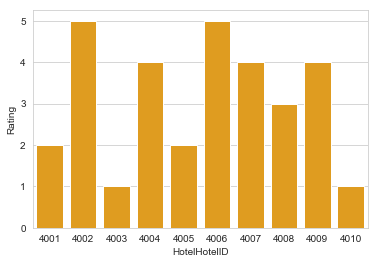

In [23]:
#Visualizing the ratings of each hotel

sns.set_style(style='whitegrid')
#sns.histplot(data=data_feed['Rating'], color='blue', kde=True)
sns.barplot(x="HotelHotelID", y="Rating", data=data_feed, color="orange" )

In [24]:
#Mongo NoSQL

In [26]:
conn_hot_db = pymongo.MongoClient("mongodb://localhost:27017/")
hotel_db = conn_hot_db["hotel_db"]
hotel_db_records = hotel_db["hotel_records"]

In [27]:
def save_hotel(options):
    hotel_id = text_hotel_id.value
    hotel_name = text_hotel_name.value
    hotel_star = text_hotel_star.value
    hotel_city = text_hotel_city.value
    hotel_country = text_hotel_country.value
    hotel_record = {"ID": hotel_id,
                    "NAME": hotel_name,
                    "STAR": hotel_star,
                    "CITY": hotel_city,
                    "COUNTRY": hotel_country}
    result_insert = hotel_db_records.insert_one(hotel_record)
    if result_insert.inserted_id is not None:
        print("Hotel entered correctly.")
    else:
        print("Error")
text_hotel_id= widgets.Text(description='ID:')
text_hotel_name=widgets.Text(description='Name:')
text_hotel_star=widgets.Text(description='Stars:')
text_hotel_city=widgets.Text(description='City:')
text_hotel_country=widgets.Text(description='Country:')
button = widgets.Button(description="Save record")

display(text_hotel_id)
display(text_hotel_name)
display(text_hotel_star)
display(text_hotel_city)
display(text_hotel_country)
button.on_click(save_hotel)
display(button)

Text(value='', description='ID:')

Text(value='', description='Name:')

Text(value='', description='Stars:')

Text(value='', description='City:')

Text(value='', description='Country:')

Button(description='Save record', style=ButtonStyle())

Hotel entered correctly.


In [30]:
results_hotel_record = hotel_db_records.find()
df_hotel_records = pd.DataFrame(results_hotel_record, columns = ['ID','NAME', 'STAR','CITY','COUNTRY'])
df_hotel_records

,ID,NAME,STAR,CITY,COUNTRY
0,501,Regent,3,Plymouth,UK
1,502,Park View,4,Exeter,UK
2,802,Continental,2,Exeter,UK


In [29]:
def delete_hotel(options):
    hotel_id = text_hotel_id.value
    hotel_name = text_hotel_name.value
    hotel_star = text_hotel_star.value
    hotel_city = text_hotel_city.value
    hotel_country = text_hotel_country.value
    hotel_record = {"ID": hotel_id,
                    "NAME": hotel_name,
                    "STAR": hotel_star,
                    "CITY": hotel_city,
                    "COUNTRY": hotel_country}
    result_delete = hotel_db_records.delete_one(hotel_record)
    if result_delete is not None:
        print("Hotel Deleted!")
    else:
        print("Error")
text_hotel_id= widgets.Text(description='ID:')
text_hotel_name=widgets.Text(description='Name:')
text_hotel_star=widgets.Text(description='Stars:')
text_hotel_city=widgets.Text(description='City:')
text_hotel_country=widgets.Text(description='Country:')
button = widgets.Button(description="Delete record")

display(text_hotel_id)
display(text_hotel_name)
display(text_hotel_star)
display(text_hotel_city)
display(text_hotel_country)
button.on_click(delete_hotel)
display(button)

Text(value='', description='ID:')

Text(value='', description='Name:')

Text(value='', description='Stars:')

Text(value='', description='City:')

Text(value='', description='Country:')

Button(description='Delete record', style=ButtonStyle())

Hotel Deleted!
